In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
from typing import List, Tuple

In [2]:
connec = np.array([
    [1,1,0,1,1,0,0,0],
    [1,1,1,0,0,1,0,0],
    [0,1,1,1,0,0,1,0],
    [1,0,1,1,0,0,0,1],
    [1,0,0,0,1,1,0,1],
    [0,1,0,0,1,1,1,0],
    [0,0,1,0,0,1,1,1],
    [0,0,0,1,1,0,1,1],
],dtype=bool)

coords = np.array([
  [-.5,  .5,  .5],
  [-.5,  .5, -.5],
  [ .5,  .5, -.5],
  [ .5,  .5,  .5],
  [-.5, -.5,  .5],
  [-.5, -.5, -.5],
  [ .5, -.5, -.5],
  [ .5, -.5,  .5],
  ], dtype=float)




In [3]:
def genTriangles(x: int) -> Tuple[List[List[int]],List[List[float]]]:

    bin_array = []
    for i in range(7,-1,-1):
        bin_array.append(x & 2**i)

    bits= np.array(bin_array,dtype=bool).reshape((1,8))

    answer = bits * (bits * connec).T
    # answer = np.col((bits * connec).T, [2,4,7]).nodup()

    answer = np.array(answer,dtype=int)

    groups = []
    for elem in answer :
        found = False
        for group in groups:
            if (elem * group).any() :
                group |= elem
                found = True
                break
        if not found and elem.any():
            groups.append(elem)
    for group in groups:
        bit_connec = (1 - bits) * (group * connec).T
        mid_indices = bit_connec.nonzero()
        mid_pos = np.array(list(zip(coords[mid_indices[0]], coords[mid_indices[1]])))
        roots_indices = group.nonzero()
        
        mean_pos = np.mean(mid_pos,axis=1)
        coords_root = coords[roots_indices]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.plot(mean_pos.T[0], mean_pos.T[2], mean_pos.T[1], "r.")
        ax.plot(coords_root.T[0], coords_root.T[2], coords_root.T[1], "ko")
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_zlim(-0.5, 0.5)
        
        mid_pos = np.concatenate((mean_pos, coords_root))

        hull = ConvexHull(mid_pos)     

        no_no = hull.vertices[-len(roots_indices[0]):]
        for s in hull.simplices:
            if np.isin(s, no_no).any():
                continue
            s = np.append(s, s[0])  # Here we cycle back to the first coordinate
            ax.plot(mid_pos[s, 0], mid_pos[s, 2], mid_pos[s, 1], "r-")

        for i in ["x", "y", "z"]:
            eval("ax.set_{:s}label('{:s}')".format(i, i))

        plt.show()


0
1


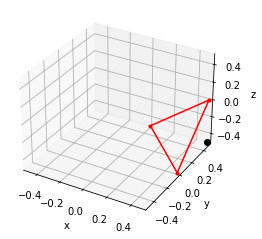

10


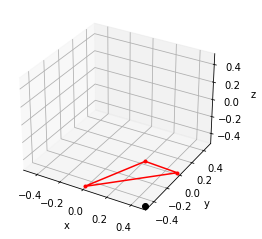

11


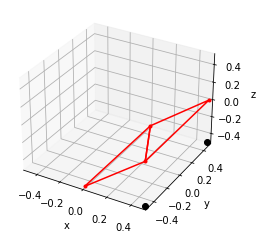

100


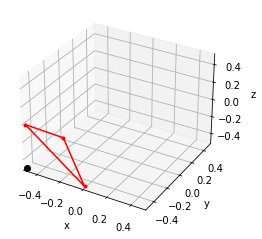

101


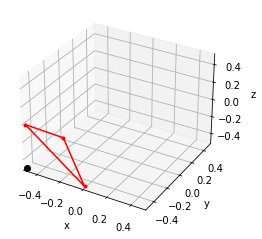

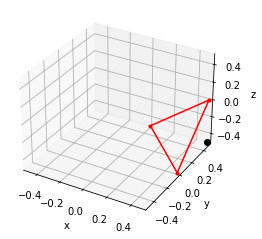

110


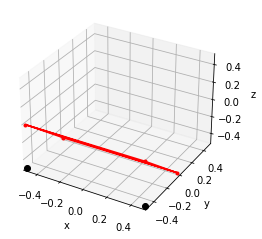

111


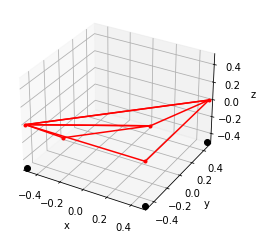

1000


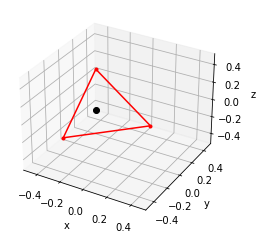

1001


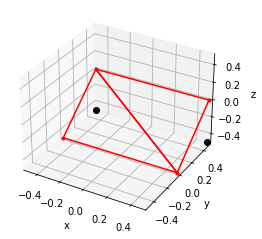

1010


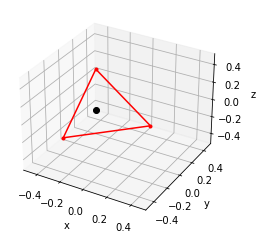

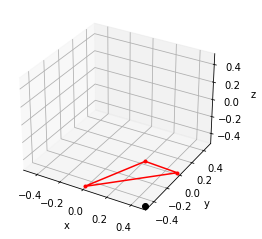

1011


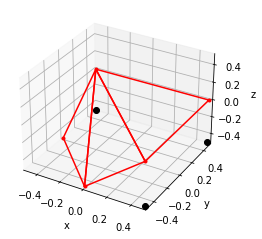

1100


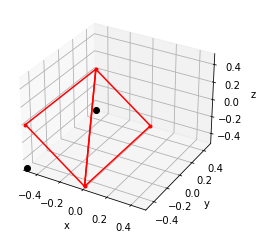

1101


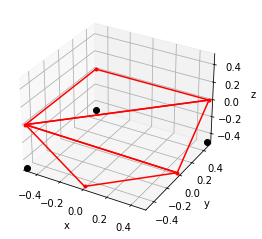

1110


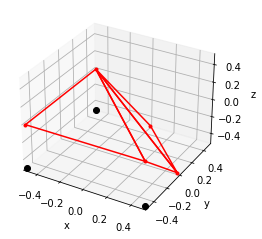

1111


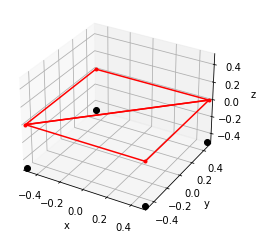

10000


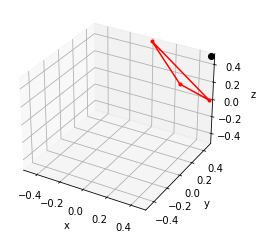

10001


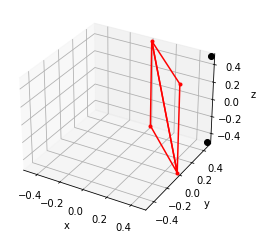

10010


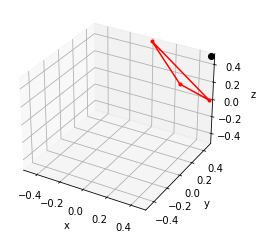

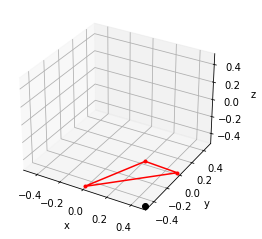

10011


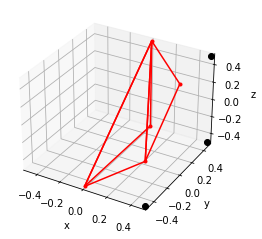

10100


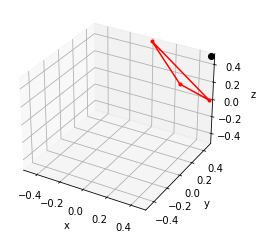

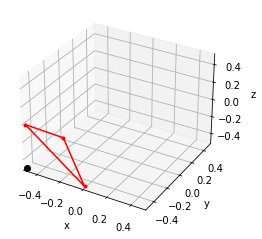

10101


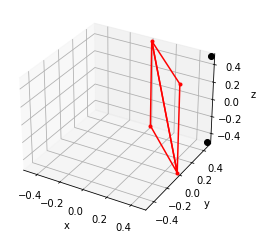

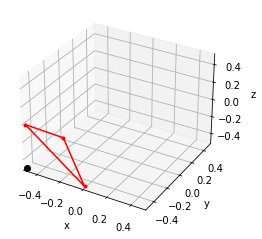

10110


In [ ]:
for i in range(0xff):
    print(f"{i:b}")
    genTriangles(i)